In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

import time
import random

from gymnasium import spaces
import molcontrol

## Parameters
steps = 100000
molecule_lifetime = 1.0
dt = 0.5
history_length = 5
observable_indices = np.array([2, 4])

##Seed
forget_param = 1/1000.0

def lookup_table(steps, target, molecule_lifetime, dt, history_length, observable_indices, upper_mol, forget_param, RUN_SEED):
    average_death = target * dt/molecule_lifetime
    action_array, counter_array = molcontrol.table_init(len(observable_indices), upper_mol, average_death)
    rewards_overtime = molcontrol.tabular_molecule_controller(action_array, counter_array, forget_param, steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED)
    return rewards_overtime, action_array, counter_array

##We run both of these functions for a large number of seeds and display the averaged results
RUN_SEEDS = np.arange(0, 10)

target_avgs = np.array([1, 2, 5, 10, 20, 30, 50])
for target in target_avgs:
    table_rewards = []
    action_arrays = []
    opt_reward = []
    upper_mol = target*3 + 10
    for SEED in RUN_SEEDS:
        rewards_overtime, action_array, counter_array = lookup_table(steps, target, molecule_lifetime, dt, history_length, observable_indices, upper_mol, forget_param, SEED)
        table_rewards.append(rewards_overtime)
        action_arrays.append(action_array)
    
    reward_array = np.stack(table_rewards)
    action_arrs = np.stack(action_arrays)
    averaged_action_arr = np.mean(action_arrs, axis=0)
    
    np.savetxt("reward_array"+str(target)+".txt", reward_array)
    np.savetxt("action_arrs"+str(target)+".txt", averaged_action_arr)
    
    print ("Done for all the seeds for average ", target)
print ("Done!")



Done for all the seeds for average  1
Done for all the seeds for average  2
Done for all the seeds for average  5
Done for all the seeds for average  10
Done for all the seeds for average  20
Done for all the seeds for average  30
Done for all the seeds for average  50
Done!


In [2]:
import numpy as np
import matplotlib.pyplot as plt

target_avgs = np.array([1, 2, 5, 10, 20, 30, 50])
reward_means_tgt = []
reward_stds_tgt = []

for target in target_avgs:
    filename = "reward_array" + str(target) + ".txt"
    reward_array = np.loadtxt(filename)

    filename = "action_arrs" + str(target) + ".txt"
    action_arrs = np.loadtxt(filename)

    # Compute the average of the last X elements for each array, and the overall mean and standard deviation of these averages
    # Since we want variability, which is the negative reward, we'll insert a negative sign
    reward_array_averages = np.mean(-reward_array[:, -50000:], axis=1)
    overall_mean_reward = np.mean(reward_array_averages)
    overall_std_reward = np.std(reward_array_averages)

    reward_means_tgt.append(overall_mean_reward)
    reward_stds_tgt.append(overall_std_reward)
    
np.savetxt("reward_means_lagg2history2.txt", reward_means_tgt)
np.savetxt("reward_std_lagg2history2.txt", reward_stds_tgt)

print ("Done!")

Done!


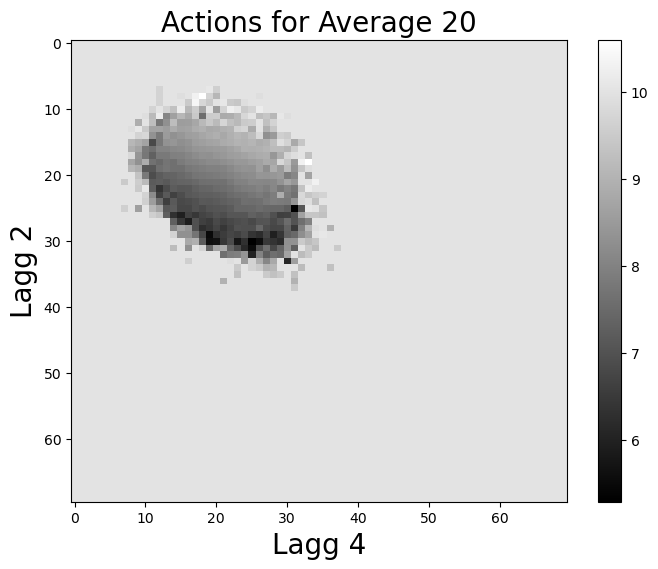

In [3]:
target = 20

filename = "action_arrs" + str(target) + ".txt"
action_arrs = np.loadtxt(filename)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(action_arrs, cmap='grey', aspect='auto')

# Adding color bar
plt.colorbar()

# Adding labels (optional)
plt.title("Actions for Average "+str(target), fontsize = 20)
plt.xlabel("Lagg 4", fontsize = 20)
plt.ylabel("Lagg 2", fontsize = 20)

# Display the plot
plt.savefig("action_values_lagg2_history2.png")
plt.show()

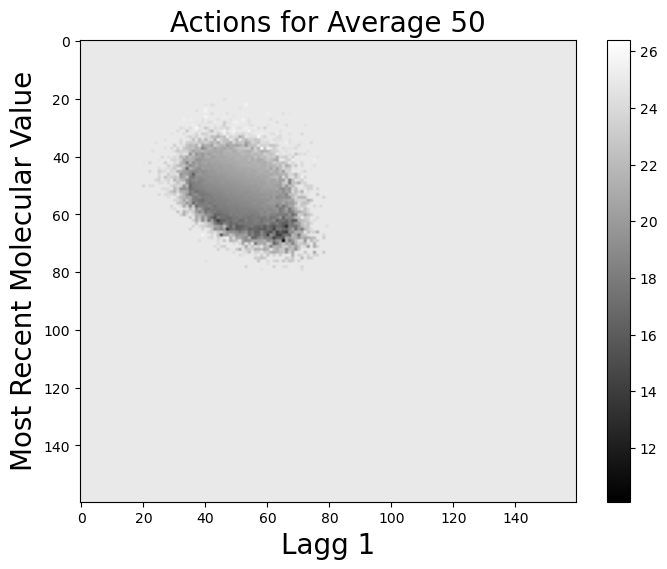

In [4]:
target = 50

filename = "action_arrs" + str(target) + ".txt"
action_arrs = np.loadtxt(filename)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(action_arrs, cmap='grey', aspect='auto')

# Adding color bar
plt.colorbar()

# Adding labels (optional)
plt.title("Actions for Average "+str(target), fontsize = 20)
plt.xlabel("Lagg 1", fontsize = 20)
plt.ylabel("Most Recent Molecular Value", fontsize = 20)

# Display the plot
#plt.savefig("action_values_extra_history.png")
plt.show()